#### Entendimiento:
Se quiere poder clasificar clientes ayudar a spotify a analizar la permanencia de sus clientes analizando patrones de compromiso

#### Enfoque análitico 

Se quiere construir un modelo de clasificación para identificar cual cliente dejara de ser subscriptor a spotify, el modelo debe tener un 92% de desempeño   

La variable objetivo es churn, chrun significa un cliente que deja de consumir los servicios o productos de una empresa  

is_churned → Target variable (0 = Active, 1 = Churned)

In [10]:
import mlcroissant as mlc
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
data = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))


  -  [Metadata(Spotify Analysis Dataset 2025)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(Spotify Analysis Dataset 2025)] Property "https://schema.org/version" is recommended, but does not exist.


[RecordSet(uuid="spotify_churn_dataset.csv")]


#### Requerimiento de los datos 
- Datos de las subscripciones
- Datos de las interacciones de los usuarios con la app 

In [ ]:
data.to
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   spotify_churn_dataset.csv/user_id                8000 non-null   object 
 1   spotify_churn_dataset.csv/gender                 8000 non-null   object 
 2   spotify_churn_dataset.csv/age                    8000 non-null   int64  
 3   spotify_churn_dataset.csv/country                8000 non-null   object 
 4   spotify_churn_dataset.csv/subscription_type      8000 non-null   object 
 5   spotify_churn_dataset.csv/listening_time         8000 non-null   int64  
 6   spotify_churn_dataset.csv/songs_played_per_day   8000 non-null   int64  
 7   spotify_churn_dataset.csv/skip_rate              8000 non-null   float64
 8   spotify_churn_dataset.csv/device_type            8000 non-null   object 
 9   spotify_churn_dataset.csv/ads_

In [7]:
#remove dataset name from feature names 
data.columns = [col.replace('spotify_churn_dataset.csv/', '') for col in data.columns]
data.info()
data.to_csv('SpotifyChurn.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   object 
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 750.1+ KB


##### Revisamos nulidad 

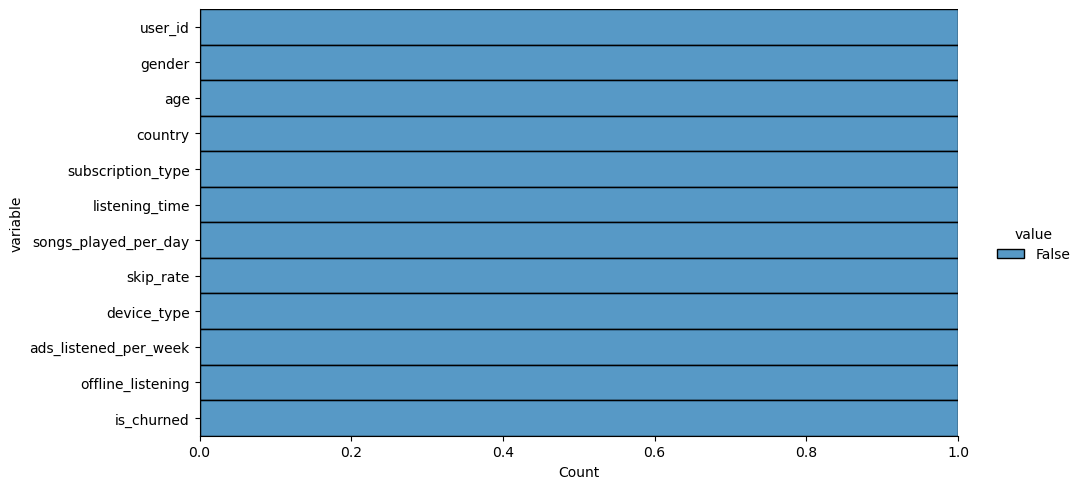

<Figure size 800x600 with 0 Axes>

In [13]:
#Visualizar la proporción de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.figure(figsize=(8,6))
plt.show()

##### Gráficas de las Variables númericas 

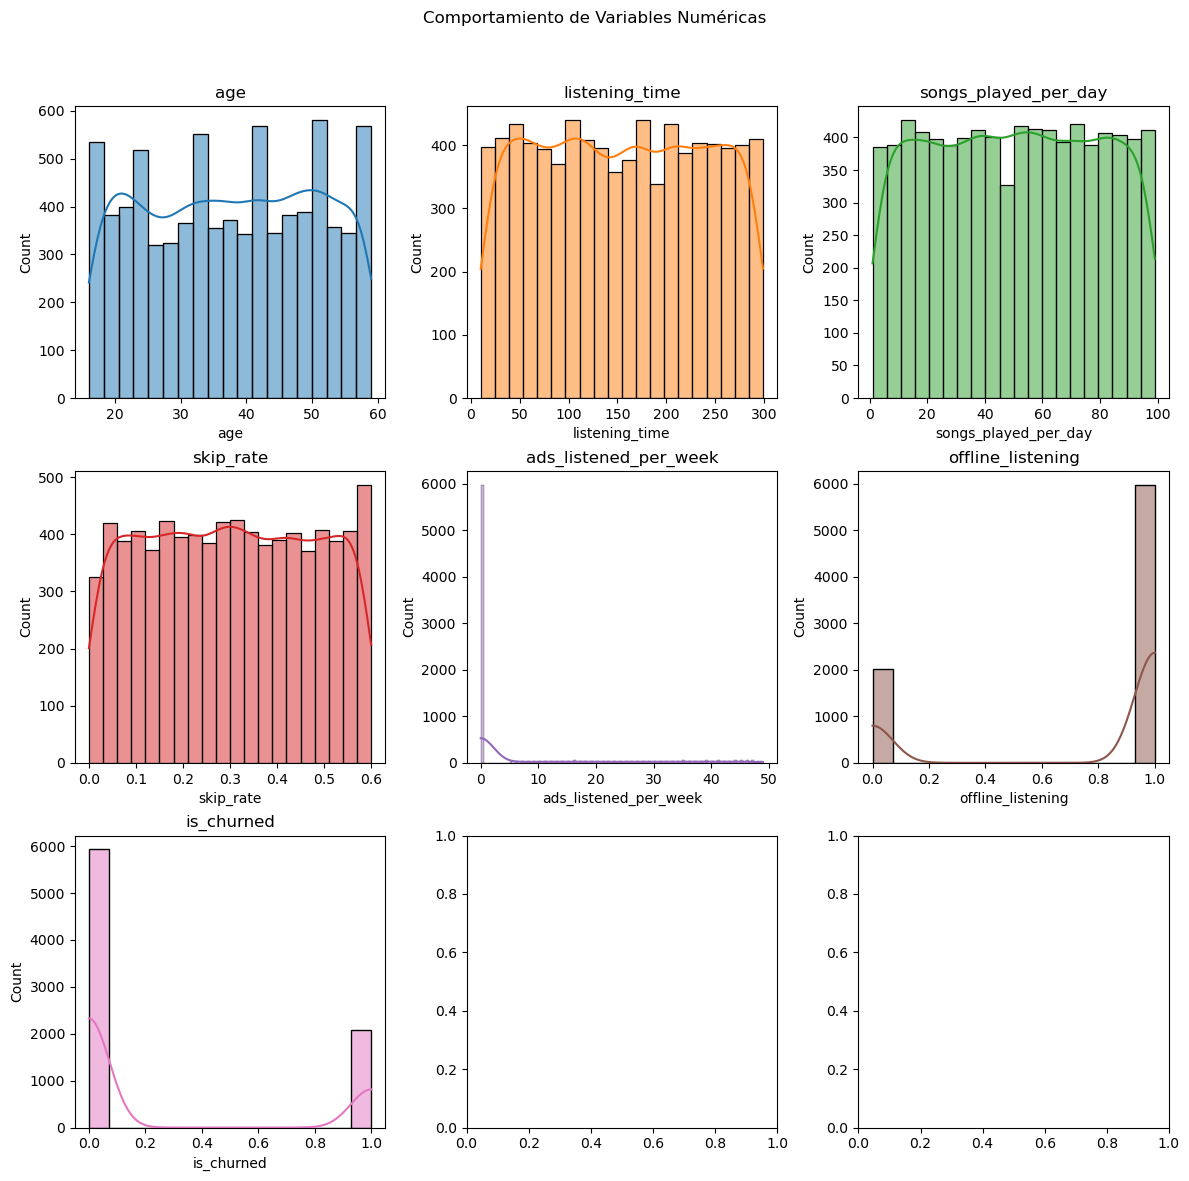

In [15]:
fig, ax = plt.subplots(3, 3, figsize = (12, 12))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

La variable de ads_listened se ve que tiene muchos valores en 0 esto se debe a que la mayoría de personas pagan una subscripción   

offline_listening y la variable objetivo is_churned son variables binarias 

##### Gráficas de variables categóricas 

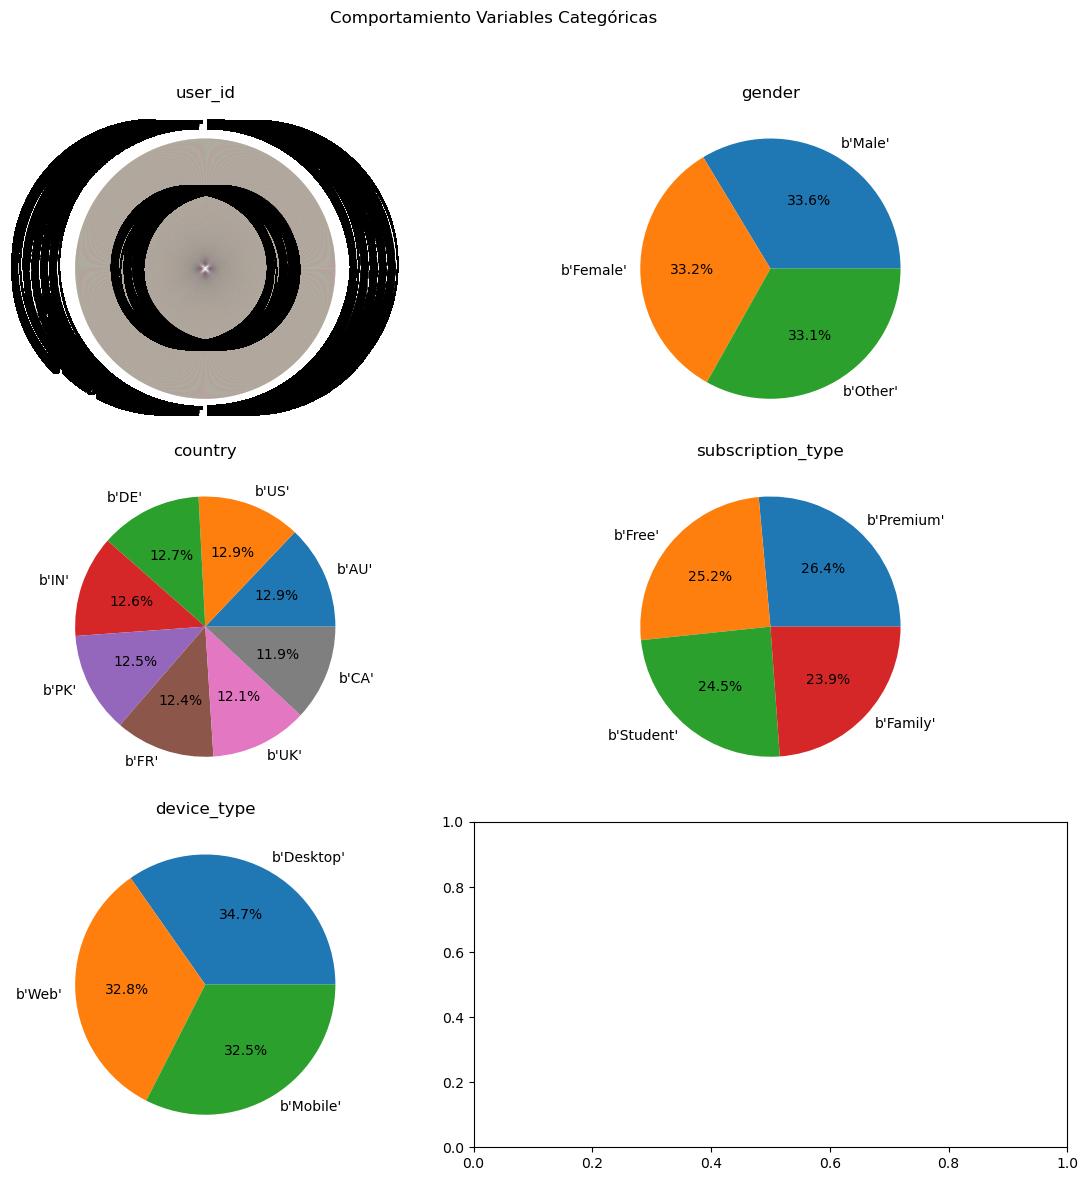

In [ ]:
##GRÁFICOS DE TORTA
fig, ax = plt.subplots(3, 2, figsize = (12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

Las variables categóricas todas están balanceadas y eliminaremos el id  

In [ ]:
data.drop('user_id', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8000 non-null   object 
 1   age                    8000 non-null   int64  
 2   country                8000 non-null   object 
 3   subscription_type      8000 non-null   object 
 4   listening_time         8000 non-null   int64  
 5   songs_played_per_day   8000 non-null   int64  
 6   skip_rate              8000 non-null   float64
 7   device_type            8000 non-null   object 
 8   ads_listened_per_week  8000 non-null   int64  
 9   is_churned             8000 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 625.1+ KB


##### Correlación 

<function matplotlib.pyplot.show(close=None, block=None)>

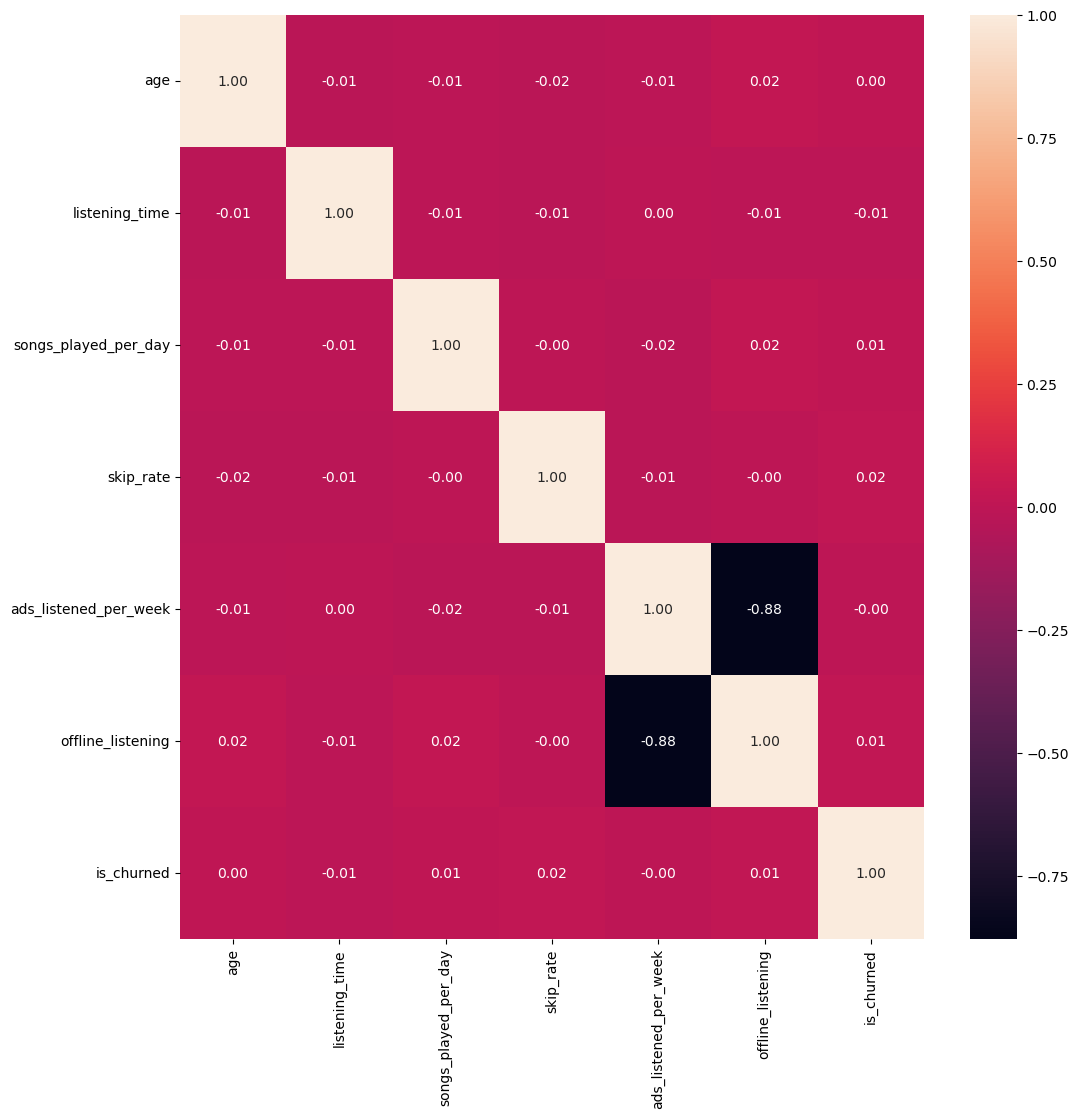

In [18]:
plt.figure(figsize=(12,12))
sb.heatmap(data = data.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show

Las variables offline_listening y ads_listened_per_week tienen una correlación alta eliminaremos offline_listening ya que tiene un poco más de correlación con las otras variables 

In [ ]:
#data.drop('offline_listening', axis=1)

dataMod = data.copy()
dataMod.to_csv('SpotifyChurnPrepared.csv', index=False)

# Los datos utilizados serán los de SpotifyChurnPrepared.csv tanto para ORGANGE como Python